<a href="https://colab.research.google.com/github/GowthamGIyer/colab/blob/main/U3A1_GowthamIyer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries

In [7]:
import numpy as np
import pandas as pd
import warnings
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

# Importing the dataset

In [10]:
dataset = pd.read_csv('/wine_assignment_data.csv')

In [11]:
print(dataset.info())
print('-'*30)
print(dataset.columns)
print('-'*30)
print(dataset.head())
print('-'*30)
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  class

# Distribution Plot of "class" variable

<Axes: title={'center': 'Distribution Plot of "class" variable'}, xlabel='class', ylabel='Density'>

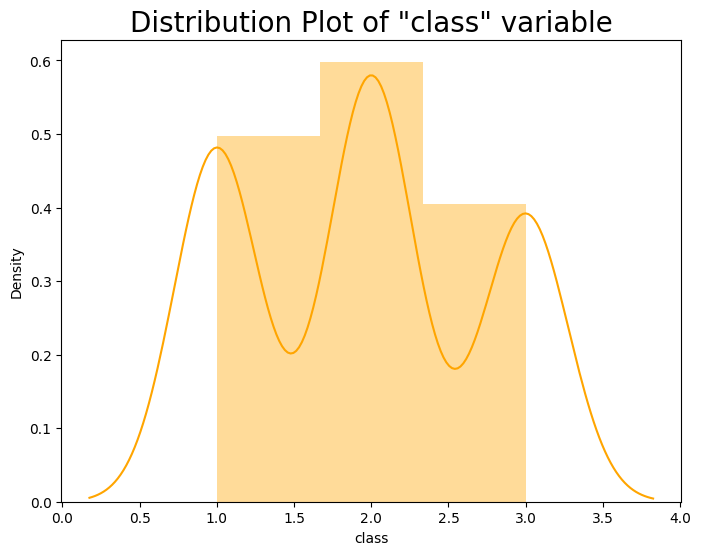

In [17]:
fig_wine, ax = plt.subplots(figsize=(8, 6))
plt.title('Distribution Plot of "class" variable', fontsize=20)
sns.distplot(dataset['class'], color='orange')

# Normalizing the dataset

In [16]:
dataset_dropped = dataset.drop('class', axis=1)
X = dataset_dropped.values[:, 1:]
dataset_cluster = StandardScaler().fit_transform(X)

# k-mean clustering of dataset

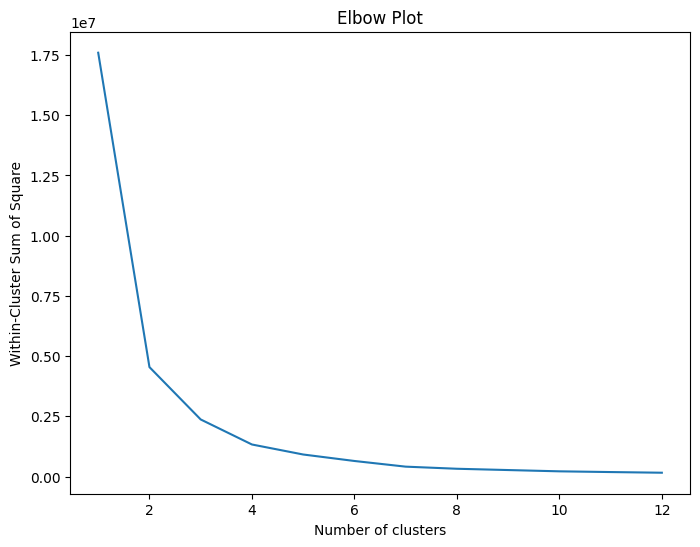

In [22]:
wcss = []
for i in range(1,13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 14, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig_k_mean_wine, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,13),wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.show()

# k-mean clustering of dataset with optimum number of clusters

In [23]:
clusterNum = 2
k_means =KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Assigning labels to each row in dataframe

In [24]:
dataset_dropped['Clus_km'] = labels
print(dataset_dropped.head())

print(dataset_dropped.groupby('Clus_km').mean())

   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  Clus_km  
0               

# Creating 2-dimensional graph

Text(0, 0.5, 'Total Phenols')

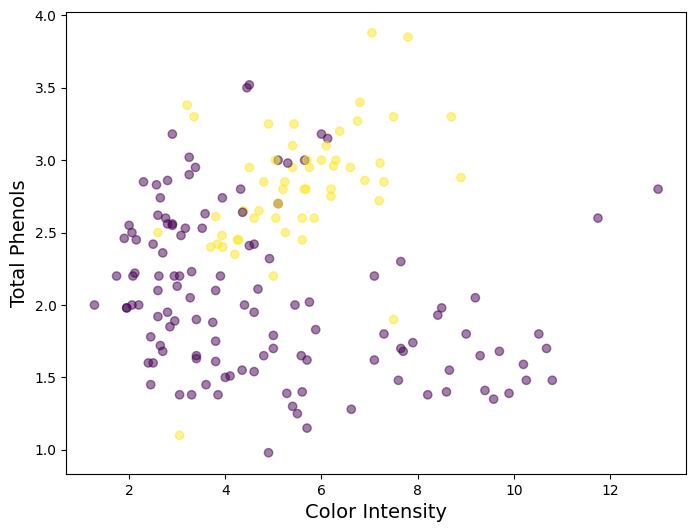

In [33]:
fig_2d_wine, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X[:, 8], X[:, 4], c=labels.astype(np.float64), alpha=.5)
plt.xlabel('Color Intensity', fontsize=14)
plt.ylabel('Total Phenols', fontsize=14)

# Creating 3-dimensional graph

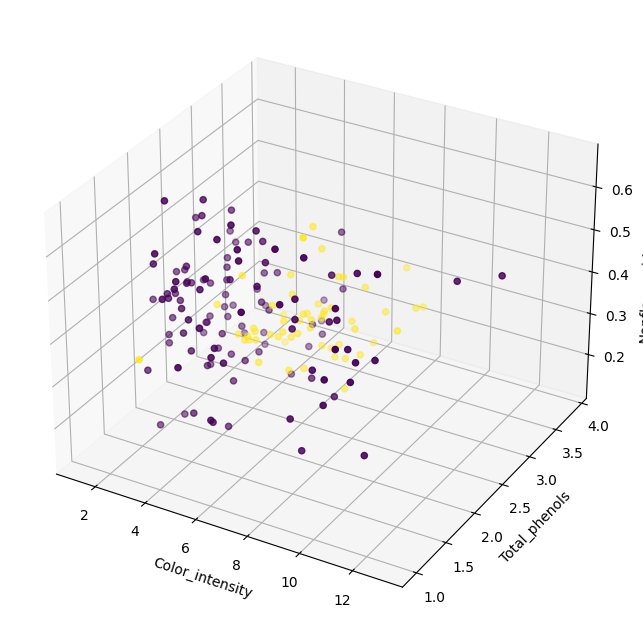

In [57]:
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(fig_3d_wine, rect=[0, 0, 0.95, 1], elev=48, azim=134)

fig=plt.figure(1, figsize=(8, 8))
ax=fig.add_subplot(111,projection='3d')

ax.set_xlabel('Color_intensity')
ax.set_ylabel('Total_phenols')
ax.set_zlabel('Nonflavanoid_phenols')

ax.scatter(X[:, 8], X[:, 4], X[:, 6], c= labels.astype(np.float64))
plt.show()